# System resilience

*What distinguishes biological systems from physical ones? - Biological systems perform computations.*

Example of system resilience problem

At some point of accumulating evidences about object of study we stop just speculating about its properties and start mathematical modelling. 

**Plan**
* Recap differential equations
    * linear ODE
    * nonlinear ODE
    * numerical integration
* Stability theory and bifurcations
    * Lyapunov stability
    * Potential equation
    * Tipping points and bifurcations (fold bifurcation)
    * Example of system
* System ODE
    * Stability in linear multidimensional case
    * Nonlinear systems
    * Linear approximations around tipping point
    * Univesality principle
    * Example complex system aging and 
* Critical slowing down
    * real data case
    * construct resilience indicator from data?
    * fitting a stochastic differential equation from data?
    * resilience analysis and maximal theoretical lifespan prediction.


## Recap differential equations

Differential equation is a very useful instrument for understanding and modeling real biological processes. Once you develop a basic intuition on differential equation you will see the world as a set of dynamic systes. What is a dynamic systems? Well, everything! Everything what we may observe evolving in time could be (and possibly must be) described with this instrument.

In general, a differential equation is written as

$$
  \dot{x} = f(x, t)
$$ (diff_eq)

where f(x, t) - given function of time $t$ and state variable $x$ itself. Note, that $x=x(t)$ is also a function of time, hence, $\dot{x} = dx(t)/dt = dx/dt$ - we omit $(t)$ for simplicity. A huge body of knowledge of differential equations theory has been elaborated for ages. In this tutorial we only touch the most important topics needed for understanding complex systems resilience introduced in the previous chapter.

### Linear ordinary differential equations

First, let's start from the most simplest cases of so called growth/death models. Let:

$$ 
    \dot{x} = a 
$$

here $a$ is a constant;

$$ 
    \frac{dx}{dt} = a 
$$
$$ 
    dx = a\cdot dt 
$$

integrate both sides,

$$ 
    \int dx = a \int dt 
$$
$$
    x(t) = at + C
$$ (ex_sol_1)

where constant $C$ is defined from initial conditions. This is the simplest case of separable equation (s.t. you can separate variable $x$ from $t$ on both sides) describes **linear growth** of $x$. For example, the amount of water accumulated in water tank fed by pipe. The next case:

$$ 
    \dot{x} = ax 
$$
$$ 
    \int \frac{dx}{x} = a\int dt 
$$
$$ 
    \ln(x(t)) = at + C
$$
$$ 
    x(t) = e^Ce^{at} = C_1e^{at}
$$ (ex_sol_2)

This equation describes dynamis of so called **exponential growth/death** depending on the sign of the coeffcicient $a$. One common example of a system described by this equation is a number of bacteria in a petri dish in case when resources for the growth are unlimited. Indeed, you know that number of bacteria next day depends on the number of bacteria on the previous day. Thus, the differential equation has the form $\dot{x} = ax$ and has a solution in a form of exponential growth.

Let's draw the solutions {eq}`ex_sol_1`, {eq}`ex_sol_2`.  

In [1]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.size'] = '16' # increase font size

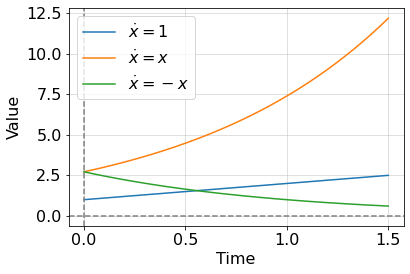

In [2]:
x1 = lambda t, a, C: a*t + C
x2 = lambda t, a, C: np.exp(a*t) * np.exp(C)

t = np.linspace(0, 1.5, 100)
C = 1

fig, ax = plt.subplots(1, 1)
ax.set_xlabel('Time')
ax.set_ylabel('Value')
ax.plot(t, x1(t, 1, C), label='$\dot{x} = 1$');
ax.plot(t, x2(t, 1, C), label='$\dot{x} = x$');
ax.plot(t, x2(t, -1, C), label='$\dot{x} = -x$');
ax.axhline(0, color='grey', ls='--')
ax.axvline(0, color='grey', ls='--')
ax.grid(alpha=0.5)
ax.legend();

Two important observations: (1) the solution of equation {eq}`ex_sol_1` is always diverges, i.e there is no non-zero constant $Const$ such that $x(\infty) \to Const$; (2) the solution of equation {eq}`ex_sol_2` has three regimes: one at positive constant $a$ - divergence (exponential growth), one at negative $a$ - convergence to zero (exponential decay), and one at $a=0$ - trivial case with no dynamics. Adjusting constant $a$ continiously leads to switching between regimes which is something that we call **bifurcation** and will study in further. In other words. they say a system undergoes a bifurcation as $a$ approaches to zero (from left or right side). Of course, in this case that the system changes its behavior **qualitatively**.

### Non-linear ordinary differential equations

Linear differential equations and systems of them porvides a lot of possibilities for modelling technical and living systems. However, already in case of bacteria growth modeling with limited resources we force the need to use quadratic models. This is where logistic model appears:

$$ 
    \dot{x} = rx(1 - \frac{x}{K}) 
$$

here we introduced two additional parameters: $r$ - growth rate, and $K$ - carrying capacity. To understand this equation deeper let's rewrite it in expanded form:

$$ 
    \dot{x} = rx - \frac{rx^2}{K} =  rx - \delta x^2
$$

The first term is a growth term responsible for the increase of number of bacteria with rate $r$. The second term is more tricky and suddenly quadratic with a new parameter $\delta = r/K$ which is interpreted as death rate. The idea of second term is that after $x$ becomes quite large number the growth must rapidly slow down modelling, thus, a deficit of resources. The good idea to use for that a quadratic term which increases faster than linear and not so hard for computation. But the right question here is: "why not cubic or exponent or something else?". It turns out that the quadratic term is a good approximation of the behavior of real-world cases of growth. One additional intuition behind quadratic term is that it reflects pairwise interactions of $x$ species, which can we may interpret as a competition for resources (aka crowding pressure).

Let's solve it:

$$ 
    \frac{dx}{dt} = rx(1 - \frac{x}{K}) 
$$
$$ 
    \frac{dx}{x(1 - \frac{x}{K}) } = rdt
$$

split left part by sum of fractions with some unknown (yet) coefficients $A$ and $B$:

$$ 
    \frac{Adx}{x} + \frac{Bdx}{(1 - \frac{x}{K}) } = rdt
$$

consider the following equation for the nominator:

$$ 
    A(1 - \frac{x}{K})dx + Bxdx = dx
$$
$$ 
    A(1 - \frac{x}{K}) + Bx = 1
$$
$$ 
    A - A\frac{x}{K} + Bx = 1
$$
$$ 
    A - x(\frac{A}{K} + B) = 1
$$

from the obtained equation we can compose the following system:

$$
\begin{cases}
    -\frac{A}{K} + B = 0 \rightarrow B = \frac{A}{K}\\
    A = 1\\
\end{cases}
$$

Thus, we have

$$ 
    \frac{dx}{x} + \frac{\frac{1}{K}dx}{(1 - \frac{x}{K}) } = rdt
$$
$$ 
    \int\frac{dx}{x} + \frac{1}{K}\int\frac{dx}{(1 - \frac{x}{K}) } = \int rdt
$$
$$ 
    \ln(x) - \ln(1 - \frac{x}{K}) = rt + C
$$
$$ 
    \ln(\frac{x}{1 - \frac{x}{K}}) = rt + C
$$
$$ 
    \frac{x}{1 - \frac{x}{K}} = C_1e^{rt}
$$

It is easy to see that $C_1$ can be computed from initial value problem (at $t=0$) as following:

$$ 
    C_1 = \frac{x_0}{1 - \frac{x_0}{K}} = \frac{Kx_0}{K - x_0}
$$

where $x_0 = x(t=0)$ correspondingly. After expressing $x$ from the integral above have:

$$ 
    x(t) = \frac{K}{1 + \frac{K - x_0}{x_0}e^{-rt}}
$$ (ex_sol_3)

What regimes are possible for this solution? Let's suppose that carrying capacity $K=1$, initial population $x_0=0.5$ and explore graphically the dynamics at different $r$:

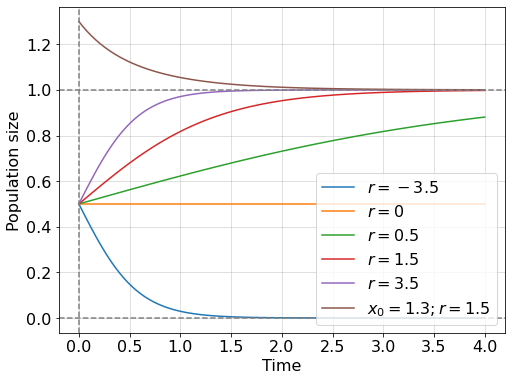

In [3]:
x3 = lambda t, K, r, x0: K / (1 + (K - x0) / x0 * np.exp(-r * t))

t = np.linspace(0, 4, 100)

fig, ax = plt.subplots(1, 1, figsize=(8,6))
ax.set_xlabel('Time')
ax.set_ylabel('Population size')
for r in [-3.5, 0, 0.5, 1.5, 3.5]:
    ax.plot(t, x3(t, 1, r, 0.5), label=f'$r = {r}$');

ax.plot(t, x3(t, 1, 1.5, 1.3), label=f'$x_0 = 1.3; r = 1.5$'); # another initial condition
ax.axhline(0, color='grey', ls='--')
ax.axhline(1, color='grey', ls='--')
ax.axvline(0, color='grey', ls='--')
ax.grid(alpha=0.5)
ax.legend(loc='lower right');

Excellent! We solved a new kind of dynamical system describing bacterial growth with limited resources. As before we observe three different regimes for $r>0$ - logistic growth; $r=0$ - no dynamics; $r<0$ - logistic decay (not exponential!). But we also see something new, our solutions for growth are bounded with carrying capacity $K=1$ and, for all initial conditions (even for larger than $K$), trajectories *attracts* to a fixed value $K$ which is called **attractor**. In the next chapter we will address more to attractors, but before that, we need to learn what to do with non-integrable non-linear differential equations.

```{admonition} Exercise
:class: dropdown
What kind of growth exhibits equation $\dot{x} = a*x^2$? Solve the equation for positive $a$ and $x_0 > 0$. What strange about this model? What is the name of this model (try to google or chatGPT it)?
```



### Numerical integration

The class of integrable differential equation is very small, even so they are extremely useful for describing complex systems dynamics. In some cases, however, you may develop more sophisticated model of a process under study and the corresponding differential equation does not have a closed form solution. What can we do in this case? Consider the following complication of the logistic model:

$$
    \dot{x} = r(t) (x  - \frac{x^2}{K(t)})  =  r_0 sin^2(t) (x  - \frac{x^2}{1 + \sqrt{t}})
$$ (eq_complex_logistic)

now our logistic model contains two additional assumptions: (i) the growth rate changes as a sinusoidal function of time $r = r(t) = r_0 sin^2(t)$ - this models a photo-sensitivity of bacteria allowing them to reproduce effectively in day time with maximum growth rate or $r_0$; (ii) the carrying capacity slowly increases with time by square root law starting from 1, namely $K = K(t) = 1 + \sqrt{t}$. You can check that this new differential equation is non-integrable in elementary functions, so we need to obtain solution **numerically**.

We introduce **Forward-Euler** scheme of integration. without going into the details of the proof, forward Euler prescribes just to iteratively compute each next step as a sum of result from the previous step and computed value of the function on the previous step. Let's rewrite our new logistic equation {eq}`eq_complex_logistic` in the general form:

$$
  \frac{dx}{dt} = f(x, t)
$$ 

rewrite the differetial equation in finite-difference form:

$$
  \frac{\Delta x}{\Delta t} = \frac{x_i - x_{i-1}}{\Delta t} = f(x_{i-1}, t_{i-1})
$$ 

expressing $x_i$ from the latter have:

$$
  x_i = x_{i-1} + f(x_{i-1}, t_{i-1})\Delta t 
$$ 

We did it! We have a clear iterative scheme for integrating our system. Let's code it, assuming that $x_0 = 0.5$:

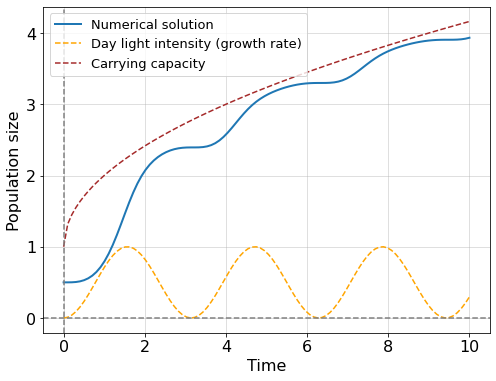

In [25]:
f = lambda x, t, r0: r0 * np.sin(t)**2 * (x - x**2 / (1 + np.sqrt(t)))

n = 100 # number of integration steps
t = np.linspace(0, 10, n)
dt = t[1] - t[0] #time difference
r0 = 3
x0 = 0.5
x = np.empty(n) #resulting integral
x[0] = x0 # assign initial condition

for i in range(1, n): #integrate from 1-st index
    x[i] = x[i-1] + f(x[i-1], t[i-1], r0) * dt

fig, ax = plt.subplots(1, 1, figsize=(8,6))
ax.set_xlabel('Time')
ax.set_ylabel('Population size')
ax.plot(t, x, label=f'Numerical solution', lw=2);
ax.plot(t, np.sin(t)**2, label=f'Day light intensity (growth rate)', color='orange', ls='--');
ax.plot(t, 1 + np.sqrt(t), label=f'Carrying capacity', color='brown', ls='--');
ax.axhline(0, color='grey', ls='--')
ax.axvline(0, color='grey', ls='--')
ax.grid(alpha=0.5)
ax.legend(loc='upper left', fontsize=13);

First, it is beautiful, isn't it? We see that day time affects an ability to growth and expanding carrying capacity determines limits of this growth. This simple example helps us to understand the **top-down** approach to modelling. This means that we do not know exactly the underlying microscopic biological mechanism inducing growth in number of bacteria, rather we try to guess the function which can *describe* the observable behaviour. This is something that also known as **phenomenological** model which tries to describe phenomenon without explicit pointing to the mechanism of it.

```{note}
:class: dropdown
Surely, forward Euler's method is not the best in terms of accuracy of approximation and speed of convergence (the famous Runge Kutta method can be much better). To dig into the plephora of algorithms for numerical integrations we recommend the following book {cite}`holmes2016introduction`
```


## Stability theory and bifurcations



{cite}`gao2016universal`

Cite Kapitza model of human population


## System of differential equations

consider $\ddot{x} = f(x)$

## Recap differential equations

# Learn More

[Principles of Biological Design (Lectures)](https://www.youtube.com/playlist?list=PLcv1wv7ZF5IXWunUDAiQym866-MntorVp) \
[Dynamical Systems with Applications using Python](https://link.springer.com/book/10.1007/978-3-319-78145-7)
